# Exploring Medical Malpractice Claims Rise

  ### Background
  According to a recent study published in the US News and World Report the cost of medical malpractice in the United States is  $55.6 billion a year, which is 2.4 percent of annual health-care spending. Another 2011 study published in the New England Journal of Medicine revealed that annually, during the period 1991 to 2005, 7.4% of all physicians licensed in the US had a malpractice claim. These staggering numbers not only contribute to the high cost of health care, but the size of successful malpractice claims also contributes to high premiums for medical malpractice insurance. The data set contains information about the last 79210 claim payments made.

### Data information:
- The data set contains information about the last 79210 claim payments made.

- Amount - Amount of the claim payment in dollars
- Severity - The severity rating of damage to the patient, from 1 (emotional trauma) to 9 (death)
- Age - Age of the claimant in years
- Private Attorney - Whether the claimant was represented by a private attorney
- Marital Status - Marital status of the claimant
- Specialty - Specialty of the physician involved in the lawsuit
- Insurance - Type of medical insurance carried by the patient
- Gender - Patient Gender

### Introduction :
- The healthcare system and medical malpractice are interconnected in various ways, and the relationship between them is crucial for patient safety, accountability and the overall quality of healthcare. 

- In the context of medical malpractice, “claims” typically refer to the legal actions or lawsuits filed by patients or families who believe they have been harmed due to negligence or substandard care by a healthcare provider. These claims are initiated to seek compensation for the damages or injuries suffered as a result of medical malpractice. 

- The outcomes of medical malpractice claims can be shaped by multiple factors. This introduction delves into the impact of several key elements, including legal representation, the patient's age, marital status, and the medical specialty involved in the case. Exploring the interplay of these factors can offer valuable insights into the dynamics of medical malpractice claims and the eventual outcomes they yield.
- Expressing the figures in thousands (by dividing by 1,000) offers clarity and a better sense of scale, particularly because the original claim amounts were large numbers.

<div style="background-color: black; height: 3px;"></div>

### Preparing Data :

In [1]:
# Import Dependencies
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import pointbiserialr
from scipy.stats import t


In [2]:
# read Study data files
df= pd.read_csv("Resources/medicalmalpractice.csv")
df.head()

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
0,57041,7,62,1,2,Family Practice,Private,Male
1,324976,6,38,1,2,OBGYN,No Insurance,Female
2,135383,4,34,1,2,Cardiology,Unknown,Male
3,829742,7,42,1,1,Pediatrics,No Insurance,Female
4,197675,3,60,0,2,OBGYN,Medicare/Medicaid,Female


In [3]:
# Checking the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79210 entries, 0 to 79209
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Amount            79210 non-null  int64 
 1   Severity          79210 non-null  int64 
 2   Age               79210 non-null  int64 
 3   Private Attorney  79210 non-null  int64 
 4   Marital Status    79210 non-null  int64 
 5   Specialty         79210 non-null  object
 6   Insurance         79210 non-null  object
 7   Gender            79210 non-null  object
dtypes: int64(5), object(3)
memory usage: 4.8+ MB


In [4]:
#Checking if there are NaN or Null
df.isna().sum()

Amount              0
Severity            0
Age                 0
Private Attorney    0
Marital Status      0
Specialty           0
Insurance           0
Gender              0
dtype: int64

In [5]:
#Replacing Private Attorney and Maritial Status values
df['Private Attorney'].replace(0, 'Not Private', inplace=True)
df['Private Attorney'].replace(1, 'Private', inplace=True)

df['Marital Status'].replace(0, 'Divorced', inplace=True)
df['Marital Status'].replace(1, 'Single', inplace=True)
df['Marital Status'].replace(2, 'Married', inplace=True)
df['Marital Status'].replace(3, 'Widowed', inplace=True)
df['Marital Status'].replace(4, 'Unknown', inplace=True)

In [6]:
#New Data Frame
df.head()

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
0,57041,7,62,Private,Married,Family Practice,Private,Male
1,324976,6,38,Private,Married,OBGYN,No Insurance,Female
2,135383,4,34,Private,Married,Cardiology,Unknown,Male
3,829742,7,42,Private,Single,Pediatrics,No Insurance,Female
4,197675,3,60,Not Private,Married,OBGYN,Medicare/Medicaid,Female


<div style="background-color: black; height: 3px;"></div>

## Research Questions to Answer:

#### 1. Are individuals represented by private attorneys more likely to receive larger settlements or judgments in medical malpractice?
- Our main focus is the claim payment amount.
- The distribution of compensation amounts within the column corresponding to individuals who hired private attorneys..."

In [7]:
plt.style.use('fivethirtyeight')

In [8]:
private_attorney_amounts = list(df[df['Private Attorney']=='Private']['Amount'])

In [9]:
not_private_attorney_amounts = list(df[df['Private Attorney']=='Not Private']['Amount'])

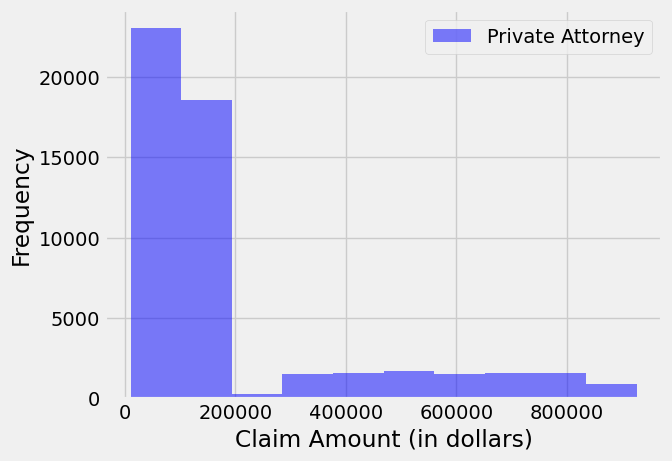

In [10]:
# Create a histogram for private attorney claim amounts
plt.hist(private_attorney_amounts, color='blue', alpha=0.5, label='Private Attorney')
# Add labels to the axes
plt.xlabel('Claim Amount (in dollars)')
plt.ylabel('Frequency')
# Add a legend to distinguish between the two histograms
plt.legend()
# Show the plot
plt.show()

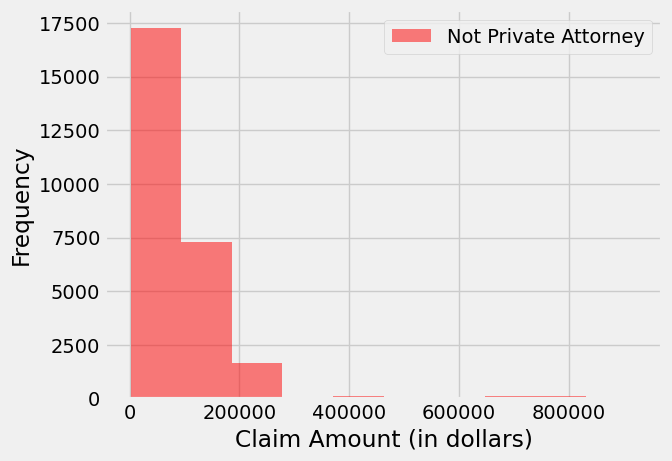

In [11]:
# Create a histogram for not private attorney claim amounts
plt.hist(not_private_attorney_amounts, color='red', alpha=0.5, label='Not Private Attorney')
# Add labels to the axes
plt.xlabel('Claim Amount (in dollars)')
plt.ylabel('Frequency')

# Add a legend to distinguish between the two histograms
plt.legend()

# Show the plot
plt.show()

- a summary of statistics for each group, providing insights into the distribution of compensation amounts for individuals based on whether they hired a private attorney or not.

In [12]:
summary_statistics_Private_Attorney=df.groupby("Private Attorney")["Amount"].describe()
summary_statistics_Private_Attorney

,count,mean,std,min,25%,50%,75%,max
Private Attorney,,,,,,,,
Not Private,26861.0,86869.740516,106594.316916,1576.0,23832.0,46444.0,130183.0,924229.0
Private,52349.0,193717.998185,216193.544094,10505.0,65259.0,113823.0,163301.0,926411.0


- These statistics provide a comprehensive overview of the distribution and central tendency of compensation amounts for both groups. The differences in the mean, median, and other percentiles between the two groups are evident, suggesting that hiring a private attorney is associated with significantly higher compensation amounts on average.

In [13]:
 #t-test to examine whether the mean claims of the two groups differed significantly.
with_attorney = df[df['Private Attorney'] == 'Private']
without_attorney = df[df['Private Attorney'] == 'Not Private']

# The average compensation for both groups and divide by 1000.
average_with_attorney = with_attorney['Amount'].mean()/1000
average_without_attorney = without_attorney['Amount'].mean()/1000

# Perform a t-test to compare the average compensation
t_statistic, p_value = ttest_ind(with_attorney['Amount'] ,without_attorney['Amount'] )

# Print the results
print(f"Average Compensation with private Attorney(in thousands dollars ): {average_with_attorney}")
print(f"Average Compensation without private Attorney(in thousands dollars ): {average_without_attorney}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

Average Compensation with private Attorney(in thousands dollars ): 193.71799818525665
Average Compensation without private Attorney(in thousands dollars ): 86.86974051598973
T-statistic: 76.37643074263448
P-value: 0.0


- We performed a t-test to examine whether the mean claims of the two groups differed significantly.
- Expressing the figures in thousands (by dividing by 1,000) offers clarity and a better sense of scale, particularly because the original claim amounts were large numbers.

## Visualization the average compensation by Attorney Hire

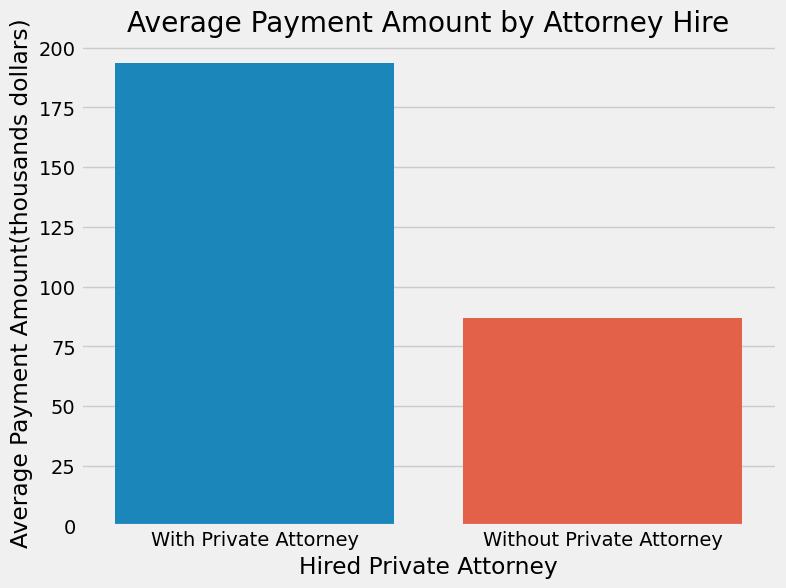

In [14]:
# Create a bar chart to visualize the average compensation
plt.figure(figsize=(8, 6))
sns.barplot(x=['With Private Attorney', 'Without Private Attorney'], y=[average_with_attorney, average_without_attorney])
plt.xlabel('Hired Private Attorney')
plt.ylabel('Average Payment Amount(thousands dollars)')
plt.title('Average Payment Amount by Attorney Hire')
plt.show()

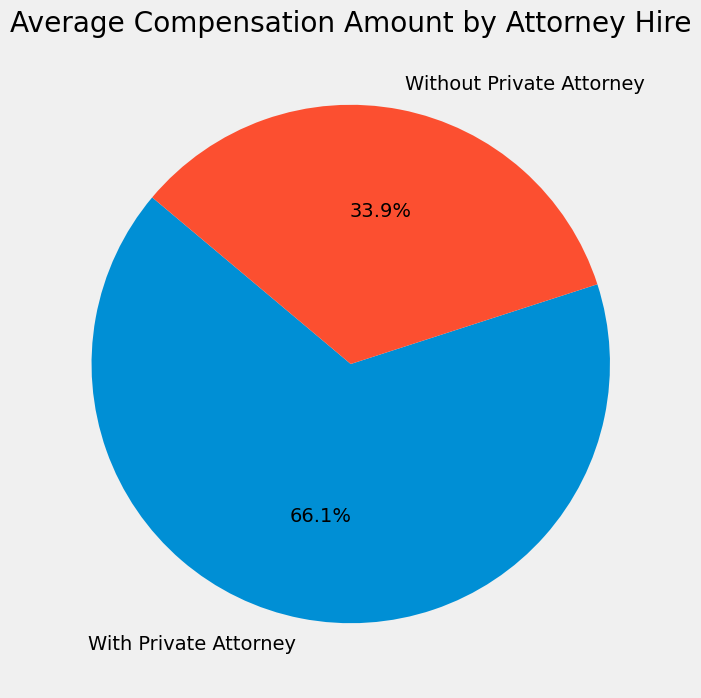

In [15]:
num_with_attorney = len(with_attorney)
num_without_attorney = len(without_attorney)

# Create data for the pie chart
data = [num_with_attorney, num_without_attorney]
labels = ['With Private Attorney', 'Without Private Attorney']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Average Compensation Amount by Attorney Hire')
plt.show()

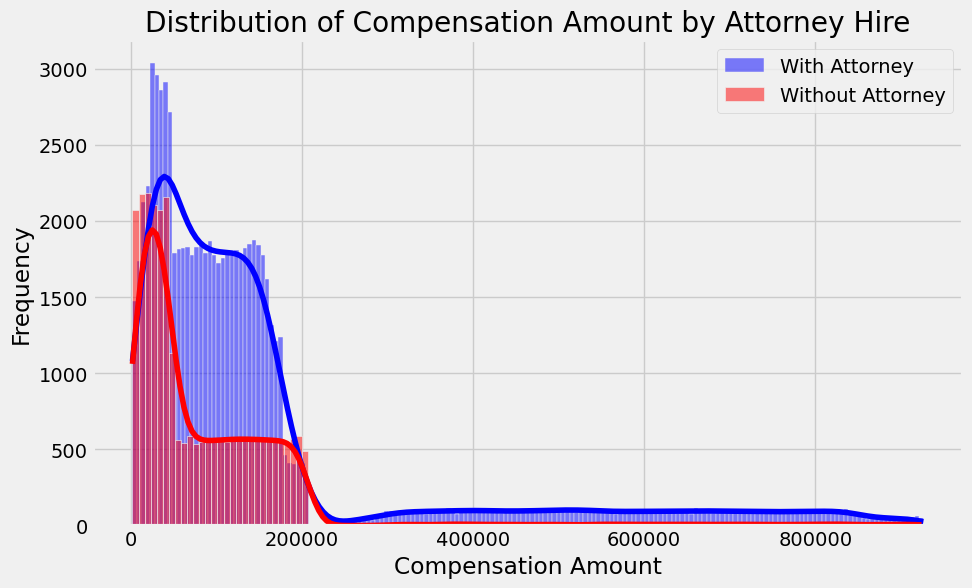

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=with_attorney, x=df['Amount'], kde=True, color='blue', label='With Attorney')
sns.histplot(data=without_attorney, x='Amount', kde=True, color='red', label='Without Attorney')
plt.xlabel('Compensation Amount')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Compensation Amount by Attorney Hire')
plt.show()

### Analysis :
- The average compensation for individuals who hired an attorney is approximately 193.72 thousand dollars.
- The average compensation for individuals who did not hire an attorney is roughly 86.87 thousand dollars.
- The t-statistic, which measures the difference in means between these two groups, is quite significant at 76.38, indicating a substantial difference in average compensation.
- The p-value associated with the t-test is extremely low (0.0), suggesting strong evidence to reject the null hypothesis that there is no difference in compensation between the two groups. In other words, it indicates that hiring an attorney is associated with significantly higher compensation on average.
- These results highlight a substantial disparity in compensation amounts between those who hire private attorneys and those who do not, with strong statistical support for this difference.

- The results of analysis indicate a significant difference in the average compensation between claims with and without a private attorney.
- In this case, it appears that hiring a private attorney has a substantial impact on the compensation received in personal claims, with claims involving private attorneys receiving significantly higher compensation on average.

<div style="background-color: black; height: 3px;"></div>

### 2. Is the age of the patient a factor influencing the size of claims?

### Age Distribuition:

In [17]:
#Age describe.
df["Age"].describe()

count    79210.000000
mean        42.701868
std         19.811063
min          0.000000
25%         28.000000
50%         43.000000
75%         58.000000
max         87.000000
Name: Age, dtype: float64

#### Visualization the age distribuitionand and the amount
- creating a figure with three subplots to visualize the relationship between 'Age' and 'Amount' in dataset. The subplots include a box plot, a scatter plot.

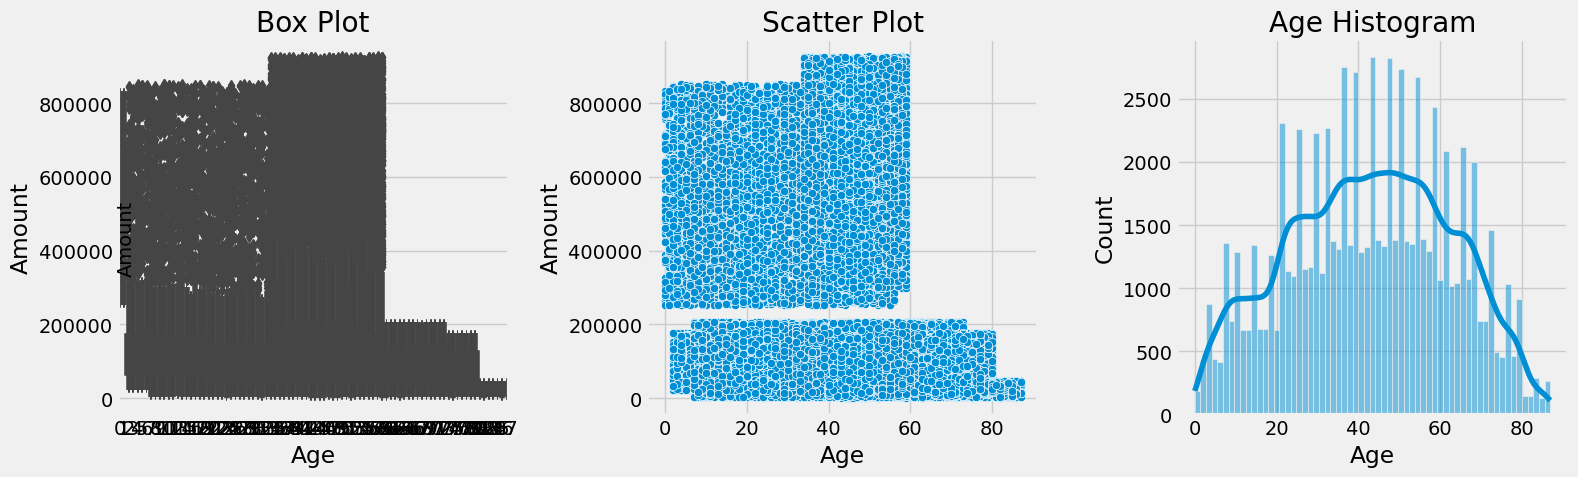

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Box Plot
sns.boxplot(x='Age', y='Amount', data=df, ax=axes[0])
axes[0].set_title('Box Plot')

# Scatter Plot
sns.scatterplot(x='Age', y='Amount', data=df, ax=axes[1])
axes[1].set_title('Scatter Plot')

# Histogram
sns.histplot(data=df, x='Age', kde=True, ax=axes[2])
axes[2].set_title('Age Histogram')

# Add a common y-axis label
fig.text(0.08, 0.5, 'Amount', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

- To examine the linear relationship between age and claim amounts, I calculated the correlation coefficient for these two variables.

In [19]:
correlation = df['Age'].corr(df['Amount'])
correlation
print(f'Correlation between Age and Claim Amount: {correlation}')

Correlation between Age and Claim Amount: -0.10529274094326797


- Based on the visualizations, such as the scatter plot, box plot, and histogram, along with the correlation coefficient of approximately -0.105, it appears that there is no substantial relationship between age and claim amounts. The data points are scattered without a clear trend, and the correlation is weak. 

- To further investigate the relationship between age and claim amounts,So will utilize the mean values. Calculating the mean claim amount for different age groups can provide additional insights into whether there is a clear pattern or trend in claim amounts with respect to age. This will allow us to examine if there is any substantial relationship between age and claim amounts, which the previous analysis did not reveal.
- Expressing the figures in thousands (by dividing by 1,000) offers clarity and a better sense of scale, particularly because the original claim amounts were large numbers.

In [20]:
#calculate the average claim amount for each age divide by 1000
age_amount=df.groupby('Age')['Amount'].mean()/1000 
age_amount


Age
0     549.106045
1     532.320588
2     190.282303
3     188.037579
4     194.468918
         ...    
83     24.853095
84     24.575718
85     25.001552
86     22.434752
87     23.424681
Name: Amount, Length: 88, dtype: float64

### Visualization the age and the average claim amount:

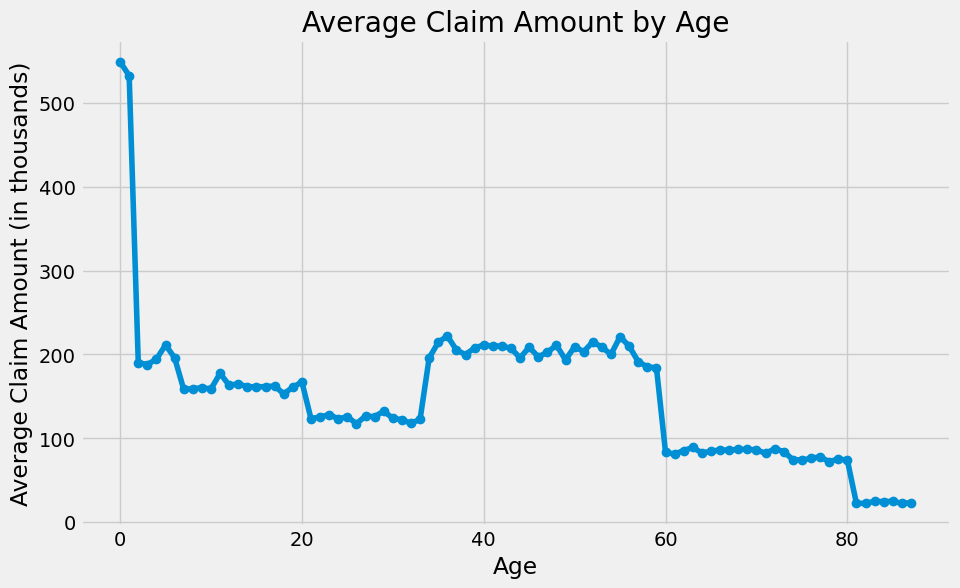

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(age_amount.index, age_amount.values, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Average Claim Amount (in thousands)')
plt.title('Average Claim Amount by Age')
plt.grid(True)
plt.show()

- We will segment the dataset into distinct age groups based on specific criteria that will help us understand the potential impact of age on claim amounts more effectively. After defining these age groups, I plan to conduct statistical tests, specifically an analysis of variance (ANOVA), to assess whether there are significant differences in claim amounts across these different age groups. ANOVA will allow us to determine if age has a statistically significant influence on claim amounts, providing valuable insights into this relationship.

In [22]:
#Define the age ranges.
age_bins = [0, 18, 30, 45, 60, 87]

# Create labels for the age ranges (optional)
age_labels = ['0-18', '19-30', '31-45', '46-60', '61-87']

# Using the cut function to bin the data into age ranges
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group the data by age ranges and calculate the average claim amount for each group divide by 1000
age_grouped = df.groupby('AgeGroup')['Amount'].mean()/1000

# Print or visualize the results
age_grouped.head()

AgeGroup
0-18     177.217956
19-30    131.035438
31-45    187.474490
46-60    203.162311
61-87     80.287182
Name: Amount, dtype: float64

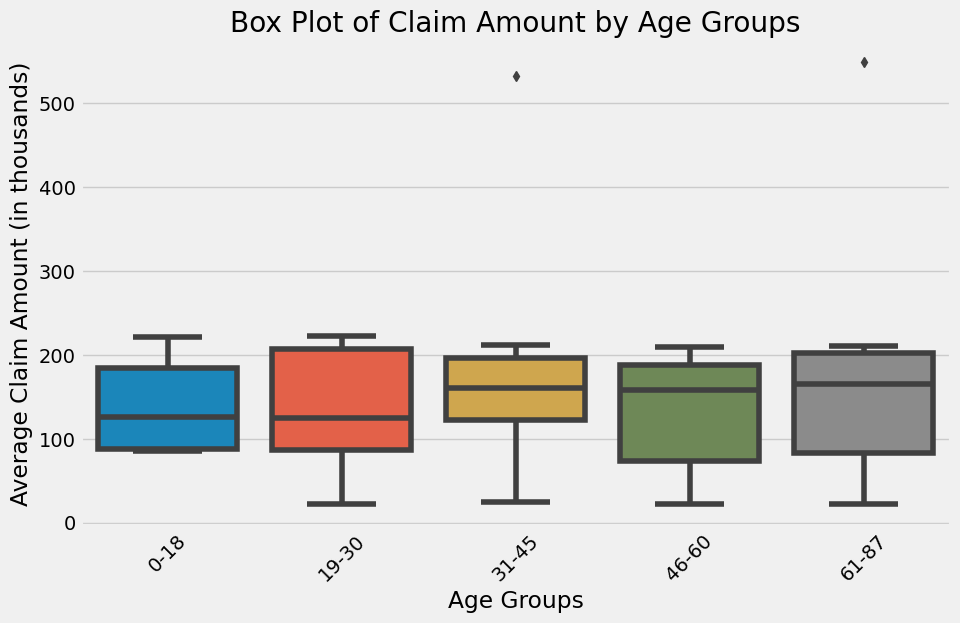

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AgeGroup'],y=age_amount, data=df)
plt.xlabel('Age Groups')
plt.ylabel('Average Claim Amount (in thousands)')
plt.title('Box Plot of Claim Amount by Age Groups')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [24]:
age_group_0_18 = df[df['AgeGroup'] == '0-18']['Amount']
age_group_19_30 = df[df['AgeGroup'] == '19-30']['Amount']
age_group_31_45 = df[df['AgeGroup'] == '31-45']['Amount']
age_group_46_60 = df[df['AgeGroup'] == '46-60']['Amount']
age_group_61_87 = df[df['AgeGroup'] == '61-87']['Amount']

# Perform ANOVA
f_statistic, p_value = f_oneway(age_group_0_18, age_group_19_30, age_group_31_45, age_group_46_60, age_group_61_87)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:  # You can adjust the significance level (alpha)
    print("There is a significant difference in claim amounts between age groups.")
else:
    print("There is no significant difference in claim amounts between age groups.")

F-statistic: 1256.2775191461405
P-value: 0.0
There is a significant difference in claim amounts between age groups.


#### Analysis:
### The result of the ANOVA test indicates that there is a significant difference in claim amounts among the different age groups.

- F-statistic: The F-statistic measures the ratio of the variance between groups to the variance within groups. In this case, it is a large value (1256.28), indicating that the variance between the age groups is significantly greater than the variance within the groups.

- P-value: The p-value associated with the F-statistic is  (0.0). A small p-value suggests that the observed differences in claim amounts among the age groups are unlikely to be due to random chance.

- Given these results, you can conclude that there is a statistically significant difference in insurance claim amounts across the age groups(age_group_0_18 ),(age_group_46_60) and (age_group_61_87) they getting high claim amount .. In other words, the average claim amounts vary significantly between the different age ranges . This means that age has a statistically significant impact on insurance claims, 


### Visualization average Claim Amount by Age Groups:

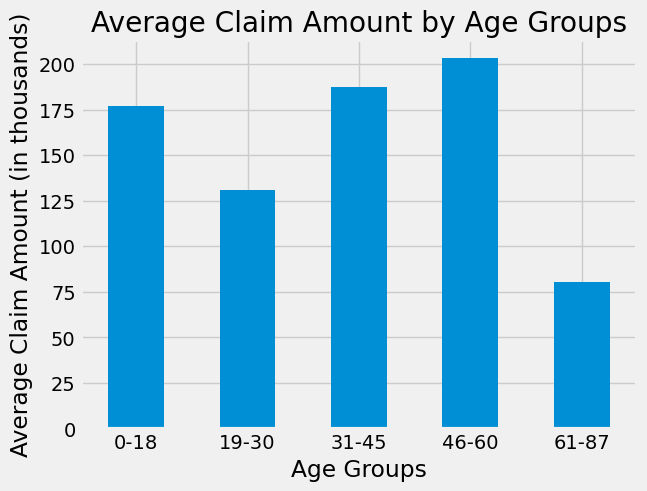

In [25]:
age_grouped.plot(kind='bar',rot=0)
plt.xlabel('Age Groups')
plt.ylabel('Average Claim Amount (in thousands)')
plt.title('Average Claim Amount by Age Groups')
plt.show()

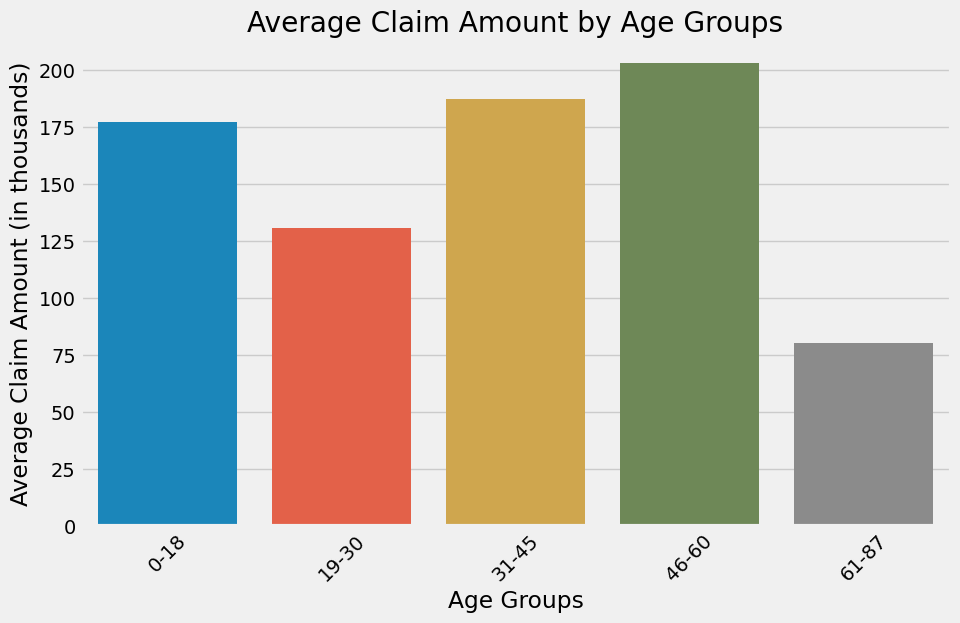

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=age_grouped.index, y=age_grouped)
plt.xlabel('Age Groups')
plt.ylabel('Average Claim Amount (in thousands)')
plt.title('Average Claim Amount by Age Groups')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

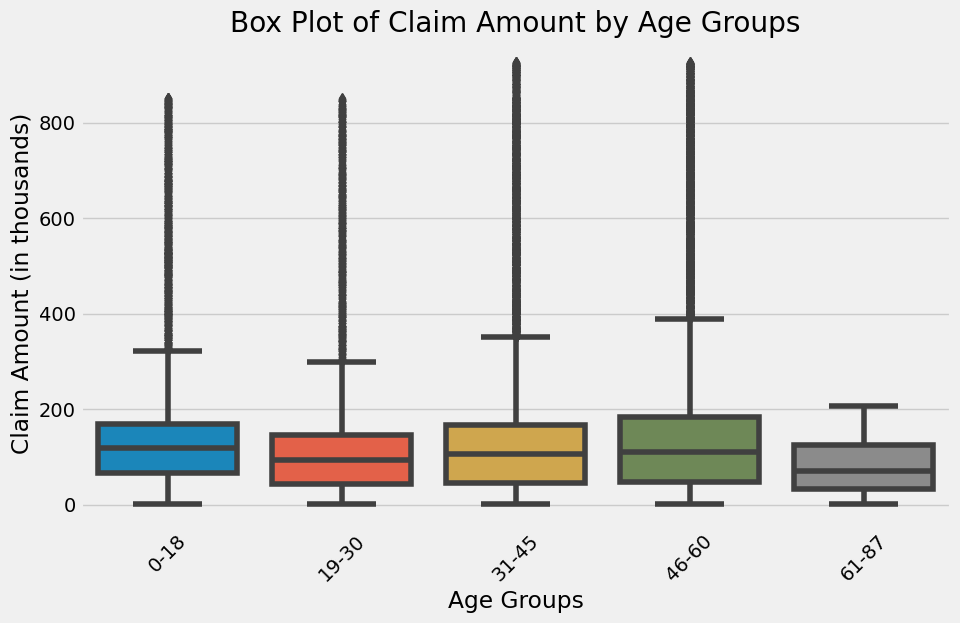

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AgeGroup'], y=df['Amount']/1000, data=df)
plt.xlabel('Age Groups')
plt.ylabel('Claim Amount (in thousands)')
plt.title('Box Plot of Claim Amount by Age Groups')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

<div style="background-color: black; height: 3px;"></div>

### 3. Which specialty has the highest malpractice insurance cost?

- In the context of medical practice, malpractice insurance is a type of insurance coverage that healthcare professionals (doctors, surgeons, nurses, etc.) purchase to protect themselves from legal claims and financial liability in case a patient alleges medical negligence or malpractice. The cost of malpractice insurance can vary significantly depending on the medical specialty, with some specialties having higher premiums due to a greater perceived risk of malpractice claims.
- Therefore,information about which medical specialty carries the highest malpractice insurance costs, reflecting the greater likelihood of malpractice claims and potentially larger settlements or judgments in those fields.

In [28]:
#Checking the type of specialty.
Specialty_values=df['Specialty'].unique()
Specialty_values

array(['Family Practice', 'OBGYN', 'Cardiology', 'Pediatrics',
       'Internal Medicine', 'Anesthesiology', 'Emergency Medicine',
       'Ophthamology', 'Urological Surgery', 'Orthopedic Surgery',
       'Neurology/Neurosurgery', 'Occupational Medicine', 'Resident',
       'Thoracic Surgery', 'General Surgery', 'Radiology', 'Pathology',
       'Physical Medicine', 'Plastic Surgeon', 'Dermatology'],
      dtype=object)

In [29]:
#calculate the average claim amount for each Specialty divide by 1000
specialty_claim_Avg = df.groupby('Specialty')['Amount'].mean()/1000
specialty_claim_Avg 

Specialty
Anesthesiology             60.398850
Cardiology                 94.159338
Dermatology               354.753329
Emergency Medicine        145.732357
Family Practice           213.266389
General Surgery           132.403394
Internal Medicine         143.943533
Neurology/Neurosurgery    241.276953
OBGYN                     219.075251
Occupational Medicine     105.521777
Ophthamology               85.673853
Orthopedic Surgery        134.362507
Pathology                 106.068291
Pediatrics                340.067640
Physical Medicine          99.081075
Plastic Surgeon           102.571229
Radiology                  45.372997
Resident                   95.521428
Thoracic Surgery           96.089142
Urological Surgery        276.582690
Name: Amount, dtype: float64

- Expressing the figures in thousands (by dividing by 1,000) offers clarity and a better sense of scale, particularly because the original claim amounts were large numbers.

In [30]:
specialty_claim_Avg = df.groupby('Specialty')['Amount'].mean()/1000

# Find the specialty with the highest total claim amount
highest_specialty = specialty_claim_Avg.idxmax()
highest_claim_amount = specialty_claim_Avg.max()*1000

# Print the result
print(f"The medical specialty with the highest malpractice Average claim amount is {highest_specialty}.")
print(f"The average claim amount for this specialty is ${highest_claim_amount:.2f}.")

The medical specialty with the highest malpractice Average claim amount is Dermatology.
The average claim amount for this specialty is $354753.33.


### Visualization average Claim Amount bySpecialty Group:

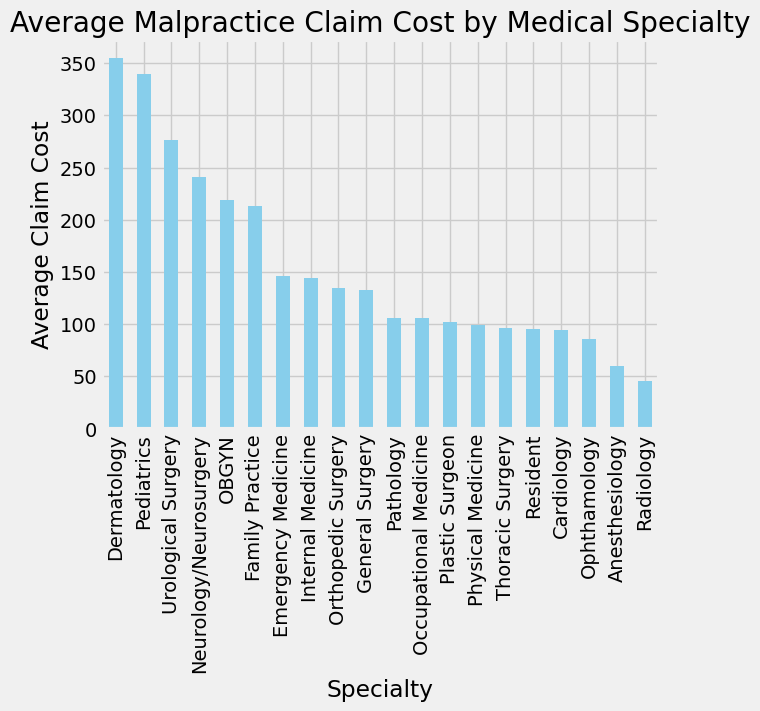

In [31]:
specialty_claim_Avg.sort_values(ascending=False).plot(kind='bar', color='skyblue')

plt.title('Average Malpractice Claim Cost by Medical Specialty')
plt.xlabel('Specialty')
plt.ylabel('Average Claim Cost')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

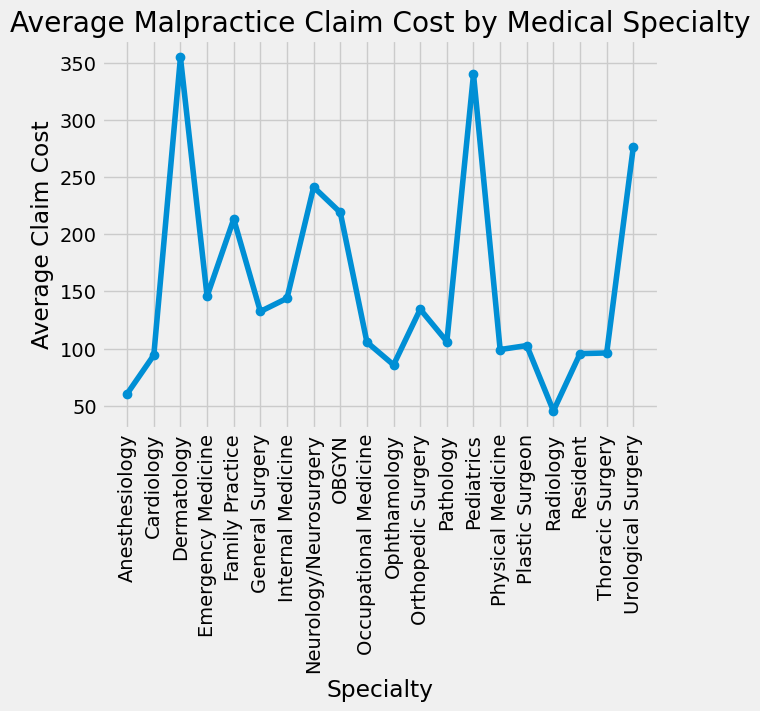

In [32]:
#specialty_claim_Avg.plot(kind='line', marker='o', color='skyblue',figsize=(20,10))
plt.plot(specialty_claim_Avg.index, specialty_claim_Avg.values, marker='o', linestyle='-')
plt.title('Average Malpractice Claim Cost by Medical Specialty')
plt.xlabel('Specialty')
plt.ylabel('Average Claim Cost')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

### Analysis :
- The specialty that has the highest malpractice insurance cost is "Dermatology." This means that, on average, Dermatologists have the highest average claim amounts or costs in malpractice insurance claims when compared to other medical specialties. In the context of medical malpractice, this specialty might have a higher frequency or severity of claims, leading to increased insurance costs for Dermatologists. It's essential to further investigate the reasons behind this to understand the specific factors driving these high insurance costs for Dermatology.

<div style="background-color: black; height: 3px;"></div>

### 4. How does the type of insurance affect the amount of claim?

- The type of insurance, including its coverage limits, deductibles, exclusions, premiums, co-insurance, underwriting, and policy terms and conditions, all play a crucial role in determining how much of a claim will be covered by the insurance company. It's important for policyholders to understand their insurance policy and its specific terms to gauge the potential impact on claim amounts.

- A summary of statistics for each type of insurance , providing insights into the distribution of compensation amounts 

In [33]:
insurance_stats = df.groupby('Insurance')['Amount'].describe()
insurance_stats

,count,mean,std,min,25%,50%,75%,max
Insurance,,,,,,,,
Medicare/Medicaid,10882.0,85152.680482,53306.567198,1589.0,36734.25,80635.0,130605.25,206462.0
No Insurance,8002.0,133026.672707,155022.325533,1614.0,40645.25,93420.0,153739.00,851272.0
Private,34289.0,226913.144128,239624.136969,1578.0,67066.00,126368.0,319733.00,926411.0
Unknown,24052.0,104550.150091,137750.612483,1576.0,31177.75,70270.0,128572.50,924502.0
Workers Compensation,1985.0,94698.072544,44809.756536,10676.0,56797.00,92560.0,132267.00,177434.0


- These statistics provide a snapshot of the distribution of claim amounts for different types of insurance plans. They help understand the central tendency (mean and median), variability (standard deviation), and the range of claim amounts for each category. Additionally, the quartiles (25%, 50%, 75%) give insights into the distribution's spread and the presence of any outliers.

#### Visualization the type of insurance affect on the distribution of compensation amounts

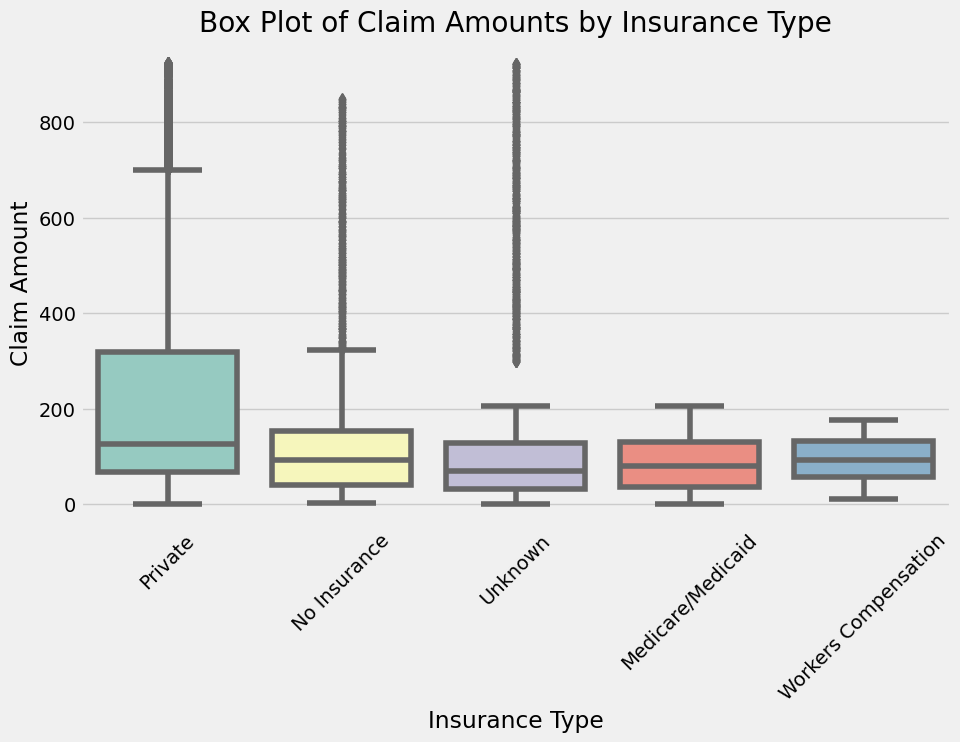

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Insurance', y=df['Amount']/1000, data=df, palette='Set3')
plt.title('Box Plot of Claim Amounts by Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Claim Amount')
plt.xticks(rotation=45)
plt.show()

- summarize and present the average claim amounts for different insurance categories. Expressing the figures in thousands (by dividing by 1,000) offers clarity and a better sense of scale, particularly because the original claim amounts were large numbers. The resulting 'insurance_Avg' variable contains this information, making it easier to report and visualize the average claim amounts across various insurance categories. This can be valuable for understanding the cost distribution and tendencies within the dataset and may assist in decision-making or analysis related to insurance claims.

In [35]:
insurance_Avg = df.groupby('Insurance')['Amount'].mean()/1000
insurance_Avg 

Insurance
Medicare/Medicaid        85.152680
No Insurance            133.026673
Private                 226.913144
Unknown                 104.550150
Workers Compensation     94.698073
Name: Amount, dtype: float64

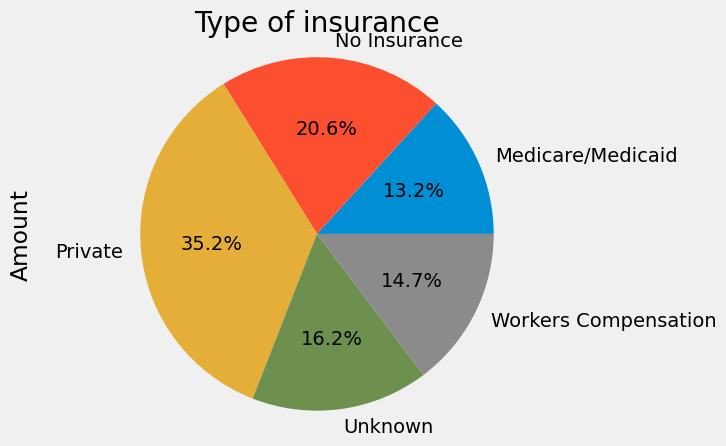

In [36]:
insurance_Avg.plot(kind="pie", y='Insurance',autopct='%1.1f%%', title=("Type of insurance"))
plt.axis("equal")
plt.show()

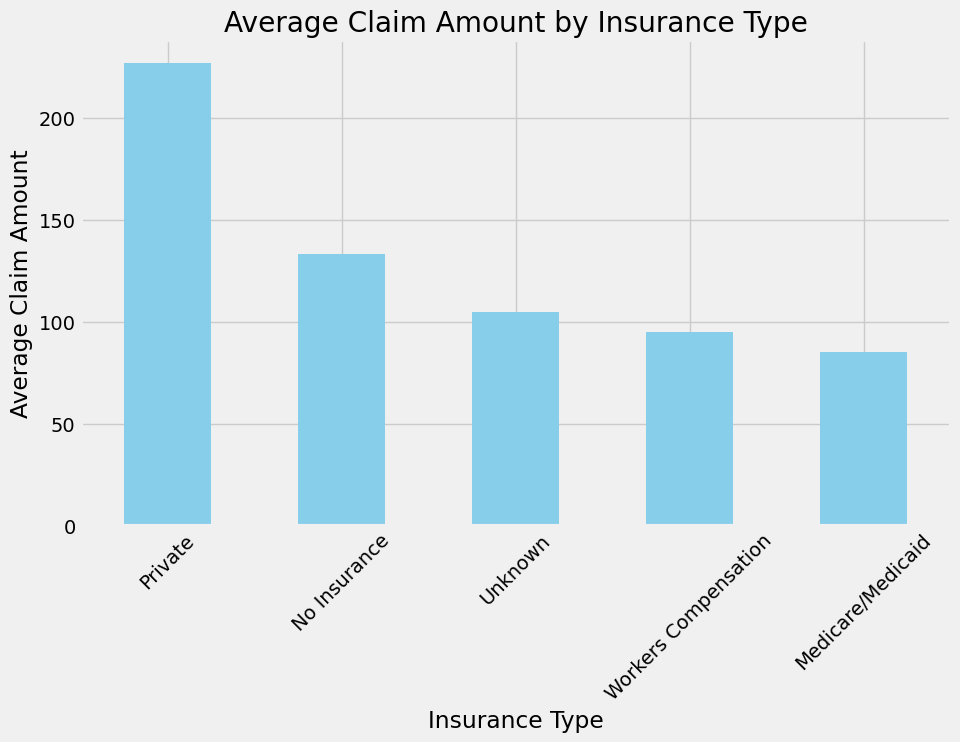

In [37]:
plt.figure(figsize=(10, 6))

# Sort insurance types by claim amount in descending order for a cleaner visualization
insurance_Avg.sort_values(ascending=False).plot(kind='bar', color='skyblue')

plt.title('Average Claim Amount by Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Average Claim Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

#### An ANOVA test:
-  An anova test can help assess how the type of insurance affects the amount of a claim by determining whether there are statistically significant differences in claim amounts between different insurance categories. 

F-statistic: 2256.261242178632
P-value: 0.0
There is a significant difference in claim amounts between insurance types.


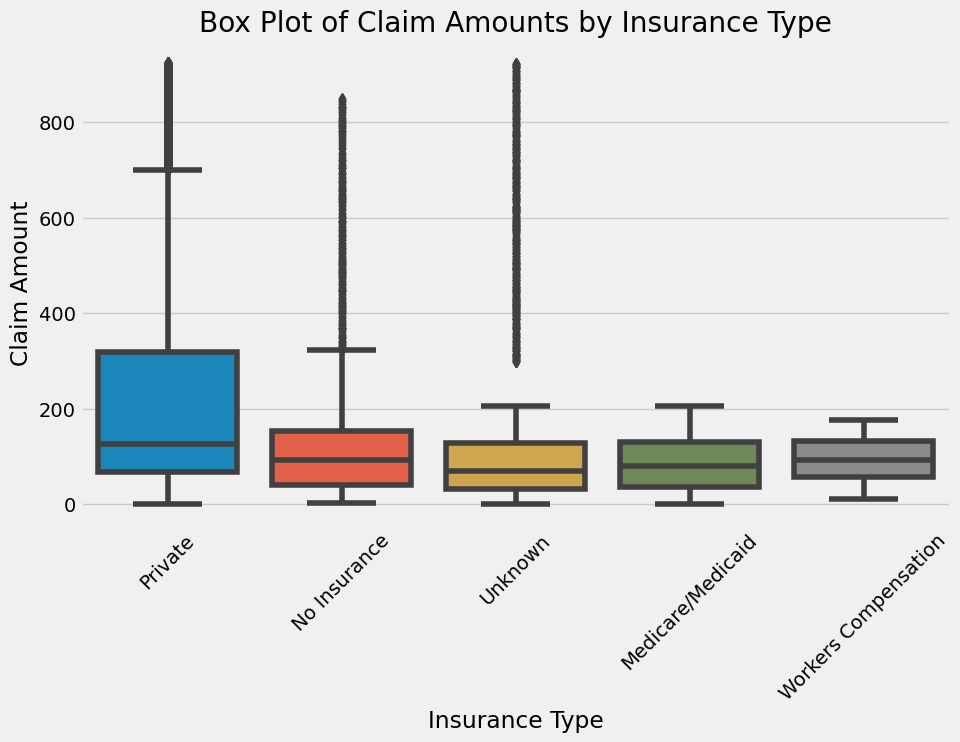

In [38]:
f_statistic, p_value = f_oneway(
    df[df['Insurance'] == 'Medicare/Medicaid']['Amount'],
    df[df['Insurance'] == 'No Insurance']['Amount'],
    df[df['Insurance'] == 'Private']['Amount'],
    df[df['Insurance'] == 'Unknown']['Amount'],
    df[df['Insurance'] == 'Workers Compensation']['Amount']
)

# Print the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Set your significance level (alpha)
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print("There is a significant difference in claim amounts between insurance types.")
else:
    print("There is no significant difference in claim amounts between insurance types.")

#  A box plot to visualize the distribution of claim amounts by insurance type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Insurance', y=df['Amount']/1000, data=df)
plt.xlabel('Insurance Type')
plt.ylabel('Claim Amount')
plt.title('Box Plot of Claim Amounts by Insurance Type')
plt.xticks(rotation=45)
plt.show()

### Analysis 
- Based on the results of the ANOVA test, it is clear that there is a significant difference in claim amounts between different insurance types. The F-statistic of 2256.26 and a p-value of 0.0 indicate strong evidence against the null hypothesis, which suggested that there would be no significant differences in claim amounts.
- With such a low p-value (less than 0.05, assuming a typical significance level), you can confidently conclude that the type of insurance has a statistically significant impact on claim amounts. This means that Private Insurance significantly differs from others in terms of the average claim amount.
- The analysis suggests that the choice of insurance type plays a crucial role in determining the amount of a claim, and this information can be valuable for making decisions related to insurance coverage and claims management.

<div style="background-color: black; height: 3px;"></div>

#### visualize the distribution of claim amounts for the medical specialty "Dermatology" :

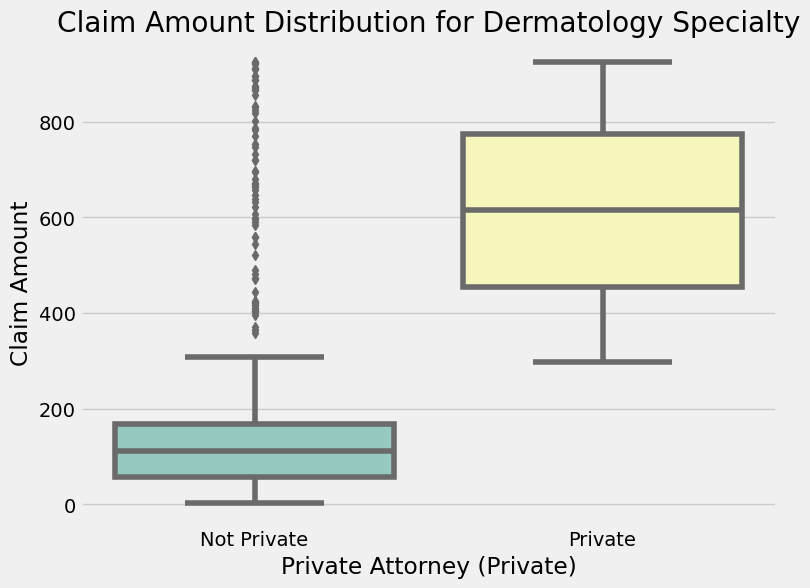

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Private Attorney', y=df['Amount']/1000, data=df[df['Specialty'] == 'Dermatology'], palette='Set3')
plt.title('Claim Amount Distribution for Dermatology Specialty')
plt.xlabel('Private Attorney (Private)')
plt.ylabel('Claim Amount')
plt.xticks([0, 1], ['Not Private', 'Private'])  # Label for x-axis
plt.show()

### Analysis:
- The visualization offers a detailed exploration of malpractice claim amounts within the field of Dermatology, focusing on cases where claimants have enlisted the services of a private attorney. By isolating these cases, the analysis seeks to uncover whether the Dermatology specialty is associated with higher claim amounts due to malpractice. The box plot visually displays the distribution of claim amounts, allowing us to discern potential differences in the central tendencies, spread, and presence of outliers between Dermatology and other medical specialties. This investigation is particularly valuable for assessing the financial implications and risks associated with malpractice claims in the field of Dermatology when private attorneys are involved.

<div style="background-color: black; height: 3px;"></div>

### CONCLUSION: 
- In conclusion, the presence of a private attorney, the insured individual's age, the medical specialty, and the type of insurance coverage the patient holds all influence the cost of insurance claims. 
- Hiring a private attorney in legal matters often leads to higher claim amounts. Private attorneys bring expertise and negotiation skills on the table, increasing the likelihood of securing larger settlements or judgements. Their involvement can result in more substantial compensation for the claimant. 
- The age of the insured individual can impact claim costs. Youngers and older individuals may face different risk profiles. For example, younger individuals may be more prone to accidents, while older individuals may experience health-related claims. This variation in risk can lead to differences in claim amounts. 
- In the context of malpractice insurance, the medical specialty practiced by a healthcare professional is a significant factor. Based on our data, Dermatology specialty is linked to increased claim amounts in malpractice cases. This can be attributed to several factors such as complex procedures, cosmetic procedures, or high patient volume. 
- Lastly, the type of insurance coverage chosen by the policyholder plays a vital role in claim costs. Private insurance plans may offer broader coverage and higher limits, leading to higher claim amounts. Conversely, public or government-sponsored insurance programs may have limitations on claim payouts. 
